ECGR 4105 Homework 4 | Khang Vu 801059139 | 10/28/2022

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import warnings
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import random
from scipy import stats
from sklearn.svm import SVC
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

Problem 1 (50pts):

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the 
highest classification accuracy. 
2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3.

Make sure to explain and elaborate your results.

In [2]:
dataset = datasets.load_breast_cancer()
input = pd.DataFrame(dataset.data)
input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [4]:
cancer = pd.DataFrame(cancer)
features = dataset.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
features_label = np.append(features,'test')
cancer.columns = features_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
X = cancer.iloc[:,:30]
Y = cancer.iloc[:,30].values

#Feature Scaling for better accuracy
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

classifier = SVC(kernel = 'rbf', class_weight='balanced', C=10)
#classifier = SVC(kernel = 'linear', class_weight='balanced', C=10)
#classifier = SVC(kernel = 'poly', class_weight='balanced', C=10)
classifier.fit(X_train,Y_train)

SVC(C=10, class_weight='balanced')

In [7]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
cm = np.array(confusion_matrix(Y_test,Y_pred,labels=[1,0]))
cnf_matrix = pd.DataFrame(cm,index =['is cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healty'])
cnf_matrix

,predicted_cancer,predicted_healty
is cancer,65,2
is_healthy,1,46


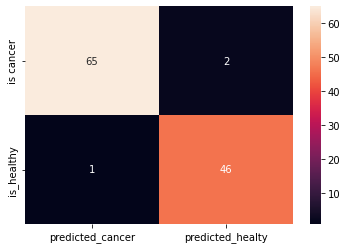

In [9]:
sns.heatmap(cnf_matrix,annot=True)

In [10]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        47
         1.0       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [11]:
#Metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 0.9736842105263158
Precision: 0.9848484848484849
Recall: 0.9701492537313433
Average: 0.9762273163687146


In [12]:
#for PCA 
x = cancer.loc[:,features].values
y = cancer.loc[:,['test']].values
x = StandardScaler().fit_transform(x)

accuracyGraph = []
precisionGraph = []
recallGraph = []

In [13]:
#K for loop
for k in range(1, 31):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, cancer[['test']]], axis = 1)
    outcome = finalDf.pop("test")
    
    x2 = finalDf.values
    y2 = outcome.values

    X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 4) 
    
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 

    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    
    accuracyGraph.append(accuracy)
    precisionGraph.append(precision)
    recallGraph.append(recall)
    
    New_average = (accuracy + precision + recall)/3
    print(New_average)
    if average < New_average: 
        average = New_average
        index = k

0.9214747549625236
0.9143170426065165
0.9220029239766081
0.9432748538011696
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.964546783625731
0.964546783625731
0.964546783625731
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849


In [14]:
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.95
Final k:  30


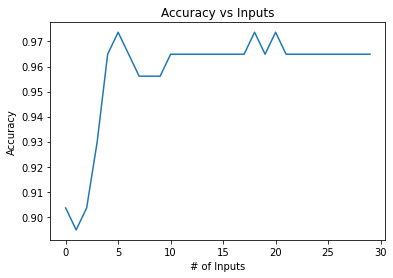

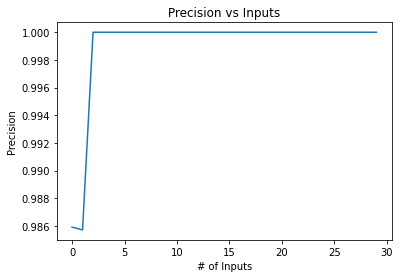

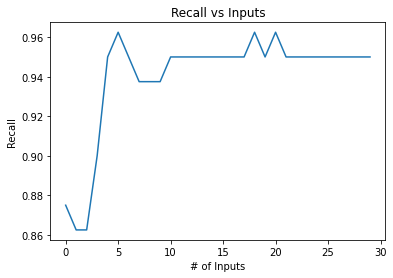

In [15]:
#Graphs
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

In [16]:
#PCA
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
#metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)

In [17]:
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        67

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[47  0]
 [ 0 67]]


Problem 2 (50pts):

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code provided on Canvas.
2. Compare your results against linear regression with regularization loss that you already did in homework1. 
3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
4. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [18]:
file_path = '/content/drive/MyDrive/Machine Learning/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
#need to clean up dataset
def clean_data(df):
    temp = df
    x = df.columns.tolist()   #turns the column titles into a list
    types = df.dtypes           #returns the type of each column
    for i in range(len(x)):
        if types[i] == 'str' or types[i] == 'object':
            temp[x[i]] = df[x[i]].astype('category').cat.codes
        else: 
            temp[x[i]] = df[x[i]]
    return temp

df = clean_data(df)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [20]:
varlist = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
X = df[varlist]
Y = df.loc[:, df.columns == 'price']

#Standardize
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=.2, random_state = 0) 

In [21]:
#svr_rbf = SVR(kernel='rbf', C=10)
#Y_RBF = svr_rbf.fit(X_train, Y_train).predict(X_test)

svr_lin = SVR(kernel='linear', C=10.0)
Y_LIN = svr_lin.fit(X_train, Y_train).predict(X_test)

#svr_poly = SVR(kernel='poly', C=10.0)
#Y_POLY = svr_poly.fit(X_train, Y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#Metrics
#print('Test R^2     : %.3f'%r2_score(Y_test, Y_RBF))
#print('Test R^2     : %.3f'%svr_rbf.score(X_test, Y_test))
#print('Training R^2 : %.3f'%svr_rbf.score(X_train, Y_train))
#R2 = svr_rbf.score(X_train,Y_train)

#print('Test R^2     : %.3f'%r2_score(Y_test, Y_POLY))
#print('Test R^2     : %.3f'%svr_poly.score(X_test, Y_test))
#print('Training R^2 : %.3f'%svr_poly.score(X_train, Y_train))
#R2 = svr_poly.score(X_train,Y_train)

print('Test R^2     : %.3f'%r2_score(Y_test, Y_LIN))
print('Test R^2     : %.3f'%svr_lin.score(X_test, Y_test))
print('Training R^2 : %.3f'%svr_lin.score(X_train, Y_train))
R2 = svr_lin.score(X_train,Y_train)

Test R^2     : 0.671
Test R^2     : 0.671
Training R^2 : 0.662


In [23]:
#print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_RBF))
#print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_rbf.predict(X_train)))

#print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_POLY))
#print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_poly.predict(X_train)))

print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_LIN))
print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_lin.predict(X_train)))

Test MSE  : 0.271
Train MSE : 0.352


In [24]:
X  = df[varlist]
Y = df.loc[:, df.columns == 'price'] 
X  = StandardScaler().fit_transform(X) 
Y = StandardScaler().fit_transform(Y)
Y = Y.flatten()
Y_Series = pd.Series(Y)

In [25]:
classifier = SVR(kernel = 'linear', C= 10)

r2GraphTrain = []
r2GraphPred = []
r2GraphTest = []

In [26]:
#PCA
for k in range(1, 12):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, Y_Series], axis = 1)
    outcome = finalDf.pop(1)
    
    x2 = finalDf.values
    y2 = outcome.values
    X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 0) 
    
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)

    # Variables to hold the Accuracy, Precision, and Recall
    NewR2= classifier.score(X_train, Y_train)
    R2Pred = r2_score(Y_test, Y_pred)
    R2Test = classifier.score(X_test, Y_test)
    # Saving the values to the appropriate list
    r2GraphTest.append(R2Test)
    r2GraphTrain.append(NewR2)
    r2GraphPred.append(R2Pred)
    
    # Averaging the three values for avg
    if  R2 < NewR2: 
        R2 = NewR2
        index = k

In [27]:
print(k)

11


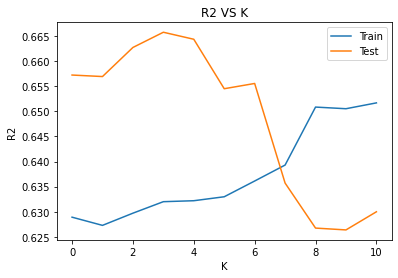

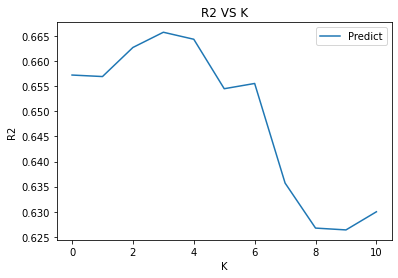

In [28]:
# Graph Accuracy
lw = 1.5
plt.plot(r2GraphTrain, lw = lw, label = "Train")
plt.plot(r2GraphTest, lw = lw, label = "Test")
plt.xlabel('K')
plt.ylabel('R2')
plt.title('R2 VS K')
plt.legend()
plt.show()
plt.plot(r2GraphPred, lw=lw, label = "Predict")
plt.xlabel('K')
plt.ylabel('R2')
plt.title('R2 VS K')
plt.legend()